In [27]:
import numpy as np
import seaborn as sns 
import folium 

In [28]:
import pandas as pd
import geopandas as gpd

In [29]:
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch

In [30]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoplot
import geoplot.crs as gcrs

In [31]:
url = 'hospitalsinSomalia.csv'
df = pd.read_csv(url)

df.head()

,Country,city,name,Facility,Ownership,Lat,Long
0,Somalia,Awdal,Aasha Caddo Health Post,Health Post,MoHL,11.1744,43.4392
1,Somalia,Awdal,Ali Xaydh Health Post,Health Post,MoHL,10.4488,43.2521
2,Somalia,Awdal,Ara-Weine Health Post,Health Post,MoHL,10.2844,43.4194
3,Somalia,Awdal,Baki Maternal & Child Health Centre,Maternal & Child Health Centre,NGO,10.0099,43.3653
4,Somalia,Awdal,Boon Maternal & Child Health Centre,Maternal & Child Health Centre,NGO,10.1851,43.0841


In [32]:
from mpl_toolkits.basemap import Basemap

In [33]:
import contextily as cx

In [34]:
world = gpd.read_file("hospitalsinSomalia.csv")

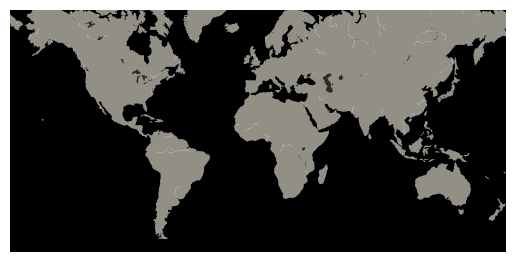

In [35]:
m = Basemap (llcrnrlon=-179,
            llcrnrlat=-60,
            urcrnrlon=179,
            urcrnrlat=70,
            projection='merc')
m.drawmapboundary(fill_color='black', linewidth=0)
m.fillcontinents(color='#d1cdbf', alpha = 0.7)
m.drawcoastlines(linewidth=0.1, color="white")

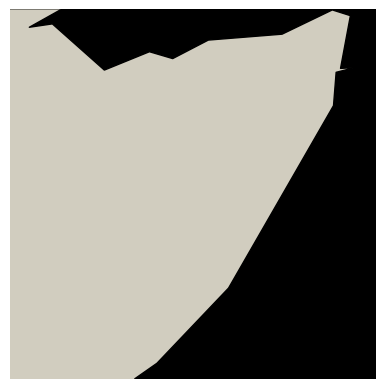

In [36]:
m = Basemap(projection= 'merc', llcrnrlat=2, urcrnrlat=12, llcrnrlon=42, urcrnrlon=52)
                
    
m.drawcoastlines()
m.drawcounties(color='grey',linewidth=1)
m.fillcontinents(color='#d1cdbf')
m.drawmapboundary(fill_color='black', linewidth=0)


plt.show() 

In [37]:
import os
import tarfile
from six.moves import urllib

hospitals_df = pd.read_csv("hospitalsinSomalia.csv")

hospitals_df.shape

(878, 7)

In [38]:
hospitals_df.head()

,Country,city,name,Facility,Ownership,Lat,Long
0,Somalia,Awdal,Aasha Caddo Health Post,Health Post,MoHL,11.1744,43.4392
1,Somalia,Awdal,Ali Xaydh Health Post,Health Post,MoHL,10.4488,43.2521
2,Somalia,Awdal,Ara-Weine Health Post,Health Post,MoHL,10.2844,43.4194
3,Somalia,Awdal,Baki Maternal & Child Health Centre,Maternal & Child Health Centre,NGO,10.0099,43.3653
4,Somalia,Awdal,Boon Maternal & Child Health Centre,Maternal & Child Health Centre,NGO,10.1851,43.0841


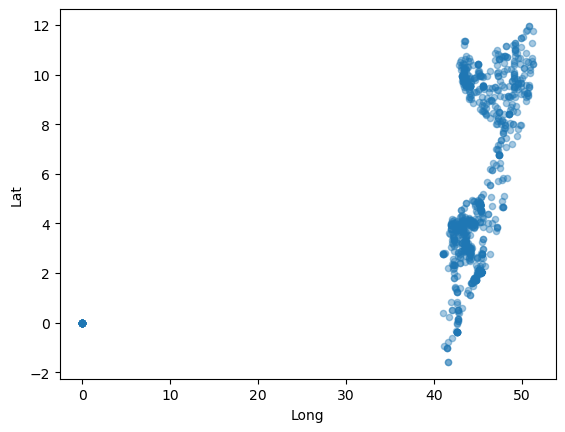

In [39]:
hospitals_df.plot(kind= "scatter", x="Long",y="Lat", alpha=0.4)
plt.show()

In [40]:
print(hospitals_df.columns)


Index(['Country', 'city', 'name', 'Facility', 'Ownership', 'Lat', 'Long'], dtype='object')


In [41]:
if hospitals_df == hospitals_df[(hospitals_df["Facility"] == 'Health Post')]




hospitals_df.plot(kind="scatter", x="Long" , y="Lat", )


                  
plt.show()

SyntaxError: expected ':' (3693343395.py, line 1)

In [42]:
hospitals_df[(hospitals_df["Facility"] == 'Health Post')].head()

,Country,city,name,Facility,Ownership,Lat,Long
0,Somalia,Awdal,Aasha Caddo Health Post,Health Post,MoHL,11.1744,43.4392
1,Somalia,Awdal,Ali Xaydh Health Post,Health Post,MoHL,10.4488,43.2521
2,Somalia,Awdal,Ara-Weine Health Post,Health Post,MoHL,10.2844,43.4194
9,Somalia,Awdal,Cadaad Health Post,Health Post,MoHL,10.0777,43.2665
10,Somalia,Awdal,Cali-Haidh Health Post,Health Post,NaN,9.1155,45.3950


KeyError: False

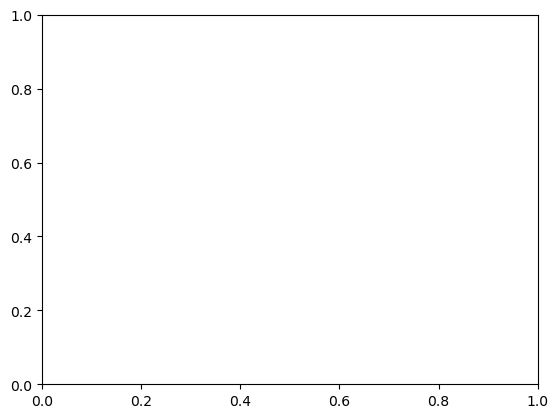

In [ ]:
hospitals_df.plot(kind="scatter", x="Long" == "Health Post",y="Lat" == "Health Post")

In [ ]:
lat = df["Lat"]
lon = df["Long"]
facility = df["Facility"]

different_facilities = facility.unique()
colors = matplotlib.colormaps.get_cmap('set2', len(different_facilities))
color_map = {facility: colors(i) for i, facility in enumerate(different_facilities)}

plt.Figure(figsize=(10,8))

for facility in different_facilities:
    subset = df[df["Facility"] == facility]
    plt.scatter(subset["Long"], subset["Lat"],
                label = facility,
                color=color_map[facility],
                alpha=0.7, edgecolors='k')
    
plt.legend(title= "facility types")
plt.grid(True)
plt.show()

TypeError: ColormapRegistry.get_cmap() takes 2 positional arguments but 3 were given

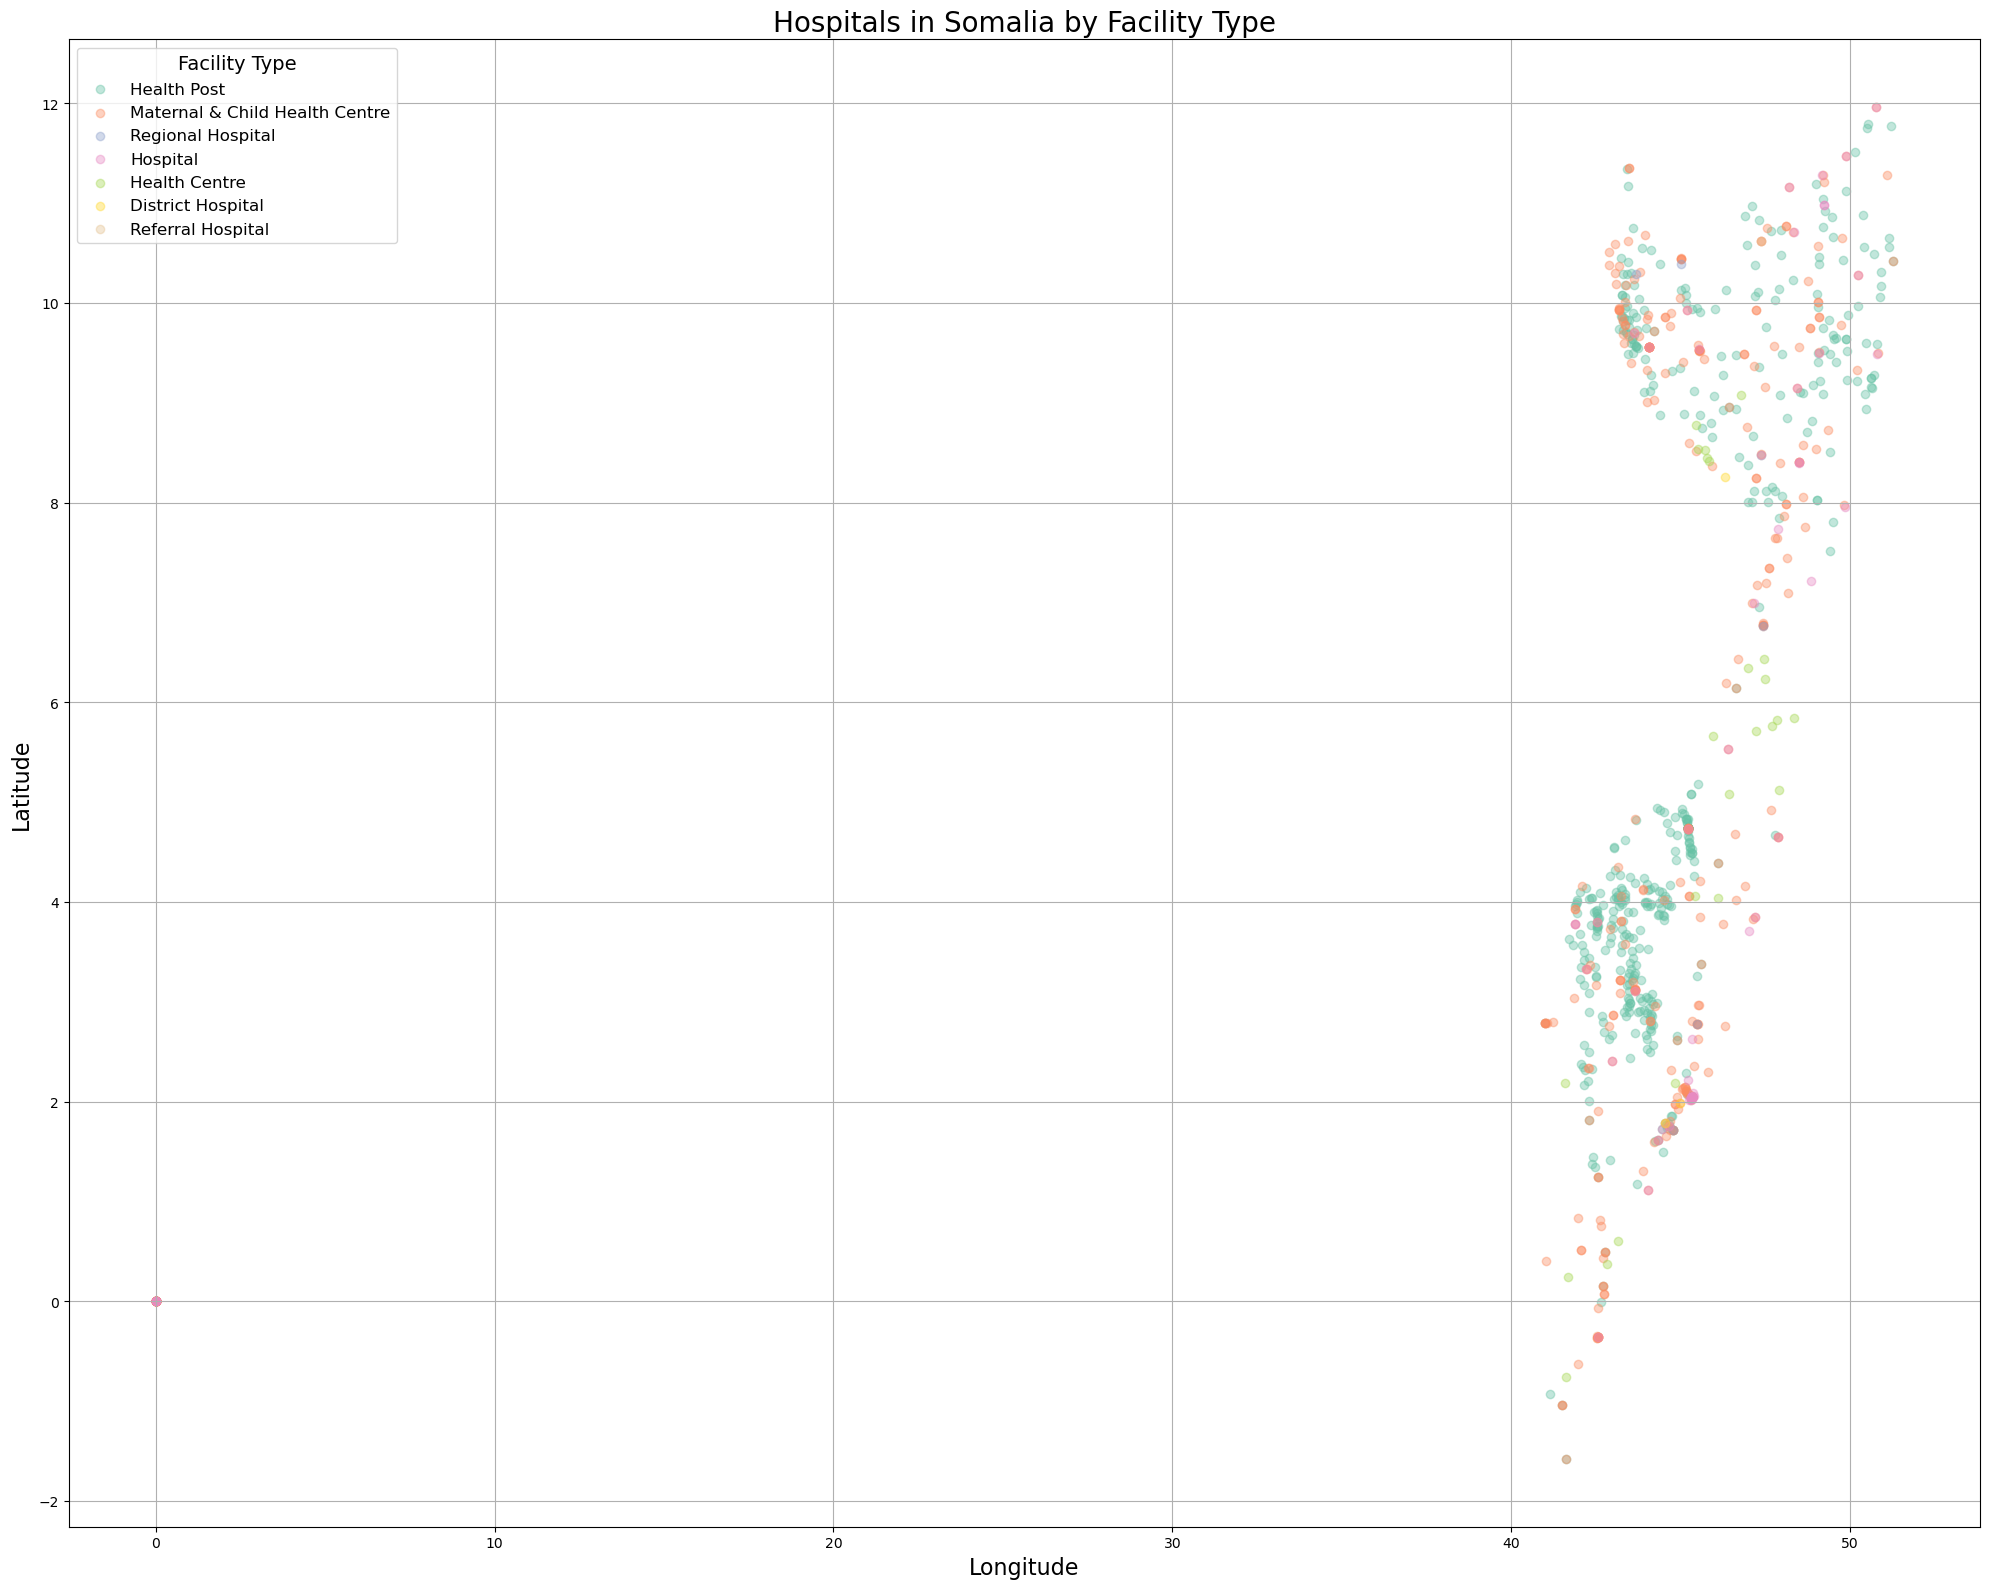

In [ ]:
df = pd.read_csv("hospitalsinsomalia.csv")

different_facilities = df["Facility"].unique()
n_types = len(different_facilities)


cmap = matplotlib.colormaps["Set2"]

colors = [cmap(i / n_types) for i in range(n_types)]

color_map = {facility: colors[i] for i, facility in enumerate(different_facilities)}

plt.figure(figsize=(20,16))
for facility in different_facilities:
    subset = df[df["Facility"] == facility]
    plt.scatter(subset["Long"], subset["Lat"],
                label=facility,
                color=color_map[facility],
                alpha=0.4)

plt.title("Hospitals in Somalia by Facility Type", fontsize=20)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)
plt.legend(title="Facility Type", fontsize=12, title_fontsize=14, loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
hospitals_df['Facility'].value_counts().head()

Facility
Health Post                       442
Maternal & Child Health Centre    334
Hospital                           70
Health Centre                      24
Regional Hospital                   5
Name: count, dtype: int64